<a href="https://colab.research.google.com/github/masa512/ece558/blob/main/set2_problem6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt


## Part A

In [55]:
# We can form toeplitz this way

def linear_conv_mtx(h,N1,N2):
  # Build a padded matrix h
  h = np.pad(h,((0,N1-h.shape[0]),(0,N2-h.shape[1])),constant_values=((0,0),(0,0)))
  # Now vectorize (column major)
  horiz = np.reshape(h,-1,'F')
  # Then we can form toeplitz
  vert = np.array([horiz[0]]+(N1*N2-1)*[0])
  H = scipy.linalg.toeplitz(c=vert,r=horiz)
  return H

Text(0.5, 1.0, 'Output 2D Array')

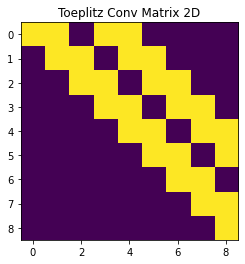

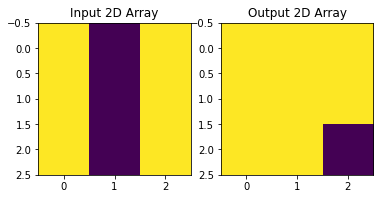

In [62]:
H = np.array([[1,1],[1,1]])
X = np.array([[1,0,1],[1,0,1],[1,0,1]])
C = linear_conv_mtx(H,3,3)

plt.figure()
plt.imshow(C)
plt.title('Toeplitz Conv Matrix 2D')

fig,axes = plt.subplots(1,2)
axes[0].imshow(X)
axes[0].set_title('Input 2D Array')

axes[1].imshow((C@(np.reshape(X,-1,'F'))).reshape((X.shape[0],X.shape[1])))
axes[1].set_title('Output 2D Array')

## Part B

In [57]:
def cconv2(X,H,N1,N2):
  # Pad X and H to the shape N1 by N2
  H = np.pad(H,((0,N1-H.shape[0]),(0,N2-H.shape[1])),constant_values=((0,0),(0,0)))
  X = np.pad(X,((0,N1-X.shape[0]),(0,N2-X.shape[1])),constant_values=((0,0),(0,0)))

  # Perform DFT2 
  fH = np.fft.fft2(H)
  fX = np.fft.fft2(X)
  fY = fH*fX

  # Inverse FFT
  Y = np.fft.ifft2(fY)

  return np.real(Y)


Text(0.5, 1.0, 'Output 2D Array')

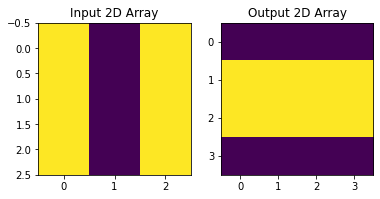

In [63]:
H = np.array([[1,1],[1,1]])
X = np.array([[1,0,1],[1,0,1],[1,0,1]])
Y = cconv2(X,H,4,4)

fig,axes = plt.subplots(1,2)
axes[0].imshow(X)
axes[0].set_title('Input 2D Array')

axes[1].imshow(Y)
axes[1].set_title('Output 2D Array')